# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

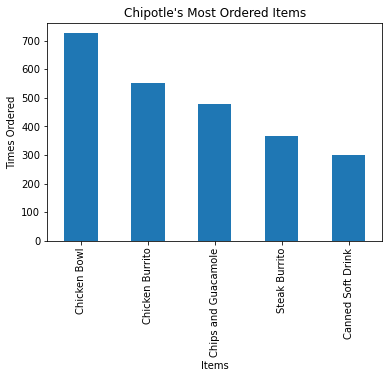

In [4]:
#generate a series of all of the possible item names
item_names_list = chipo.item_name

#track each purchas of each item using Counter() which creates a dictionary with unique series value counts
purchase_counts = Counter(item_names_list)

#use pandas.DataFrame.from_dict to create a dataframe from our dictionary purchase_counts oriented on the rows
item_ordered_quantities = pd.DataFrame.from_dict(purchase_counts, orient = 'index')

#sort the dataframe on index zero by descending order and take the first five values
item_ordered_quantities = item_ordered_quantities[0].sort_values(ascending = False)[0:5]

#plot the dataframe (when using a dataframe as a plot, it comes before plot)
item_ordered_quantities.plot(kind = 'bar')

#name axis and title
plt.xlabel('Items')
plt.ylabel('Times Ordered')
plt.title('Chipotle\'s Most Ordered Items')

#display just the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

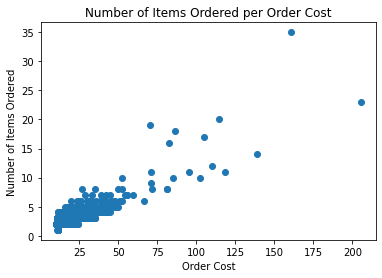

In [5]:
#item price starts with a $ and ends with a space so we need to drop those
chipo.item_price = [float(item[1:-1]) for item in chipo.item_price]
#we want to group the orders by ID and sum the columns so that we get a
#total price
order_prices = chipo.groupby('order_id').sum()

#now that our data is where we want it, we can create a scatter plot
plt.scatter(x = order_prices.item_price, y = order_prices.quantity)
plt.xlabel('Order Cost')
plt.ylabel('Number of Items Ordered')
plt.title('Number of Items Ordered per Order Cost')

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.